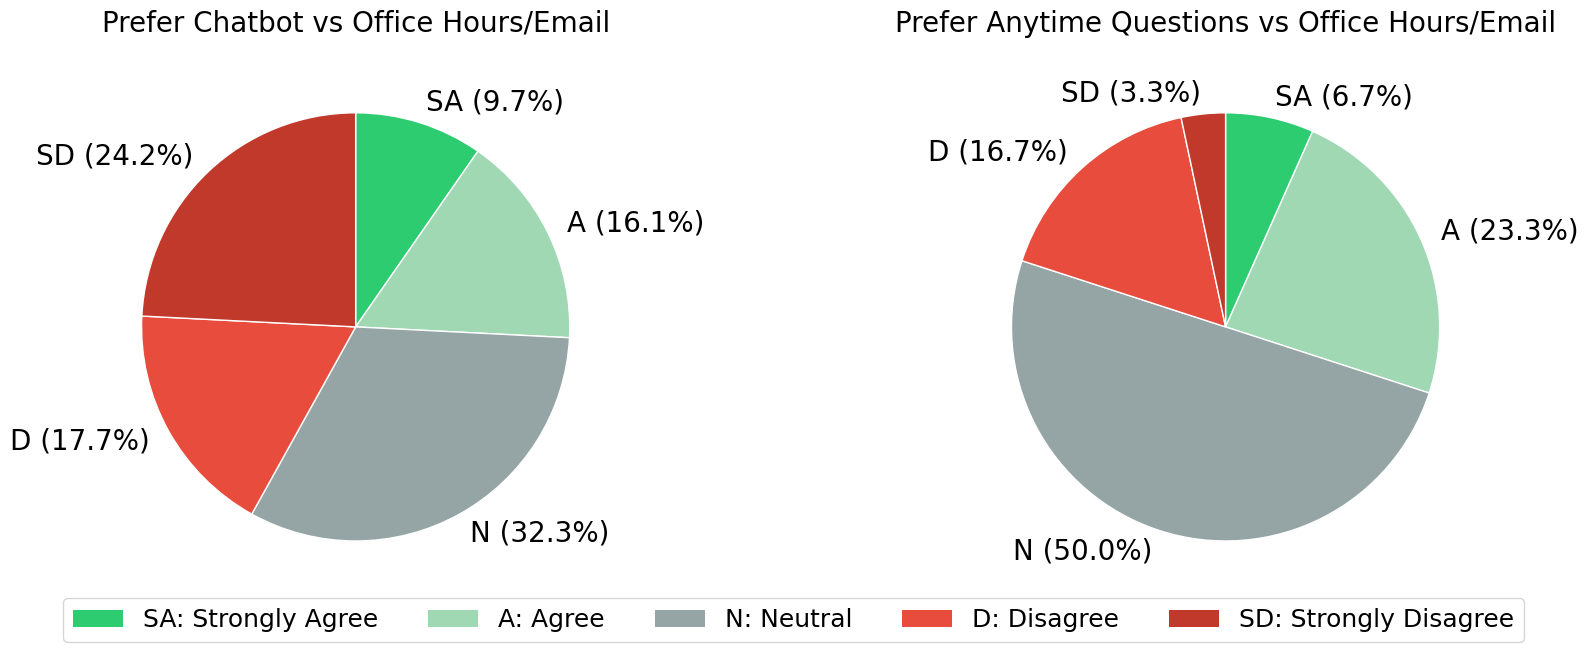

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("./survey.xlsx")

df_clean = df.iloc[1:].copy()
df_clean = df_clean[df_clean['Finished'] == 'True']

# Channel preference questions
channel_questions = {
    'Q21_8': 'Prefer Chatbot vs Office Hours/Email',
    'Q24_1': 'Prefer Anytime Questions vs Office Hours/Email',
    # 'Q13_2': 'Prefer HelpMe vs Traditional Office Hours'
}

# Define short labels for the categories
short_labels = {
    'Strongly Agree': 'SA',
    'Somewhat Agree': 'A',
    'Agree': 'A',
    'Neutral': 'N',
    'Somewhat Disagree': 'D',
    'Disagree': 'D',
    'Strongly Disagree': 'SD',
    'Strongly agree': 'SA',
    'Somewhat agree': 'A',
    'Disagree': 'D',
    'Somewhat disagree': 'D',
    'Strongly disagree': 'SD'
}

color_mapping = {
    'SA': '#2ecc71',  
    'A': '#a0d8b3',   
    'N': '#95a5a6',  
    'D': '#e74c3c',   
    'SD': '#c0392b'   
}

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for idx, (col, title) in enumerate(channel_questions.items()):
    df_clean['Short_Label'] = df_clean[col].map(short_labels)
    
    df_clean['Short_Label'] = df_clean['Short_Label'].fillna('Unknown')
    responses = df_clean['Short_Label'].value_counts().reindex(['SA', 'A', 'N', 'D', 'SD'], fill_value=0)

    responses.plot(
        kind='pie',
        ax=axes[idx],
        labels=[f"{label} ({count / responses.sum() * 100:.1f}%)" 
                for label, count in responses.items() if count > 0],
        colors=[color_mapping.get(label, '#bdc3c7') for label in responses.index if responses[label] > 0],
        autopct='',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'},
        textprops={'fontsize': 20} 
    )
    axes[idx].set_title(title, pad=20,fontsize=20)
    axes[idx].set_ylabel('')  
    


from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=color_mapping['SA'], label='SA: Strongly Agree'),
    Patch(facecolor=color_mapping['A'], label='A: Agree'),
    Patch(facecolor=color_mapping['N'], label='N: Neutral'),
    Patch(facecolor=color_mapping['D'], label='D: Disagree'),
    Patch(facecolor=color_mapping['SD'], label='SD: Strongly Disagree')
]

fig.legend(
    handles=legend_elements, 
    loc="lower center",
    ncol=5,
    bbox_to_anchor=(0.5, -0.1),
    fontsize=18 
)

plt.tight_layout()
plt.subplots_adjust(bottom=0)  
plt.show()